In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Test Blind Color

In [24]:
def simulate_colorblindness(image, blindness_type):
    """
    Simulate how colorblind people see colors.
    """
    # Transform matrices for different types of colorblindness
    matrices = {
        "normal": np.eye(3),
        "protanopia": np.array([
            [0.567, 0.433, 0],
            [0.558, 0.442, 0],
            [0, 0.242, 0.758]
        ]),
        "deuteranopia": np.array([
            [0.625, 0.375, 0],
            [0.7, 0.3, 0],
            [0, 0.3, 0.7]
        ]),
        "tritanopia": np.array([
            [0.95, 0.05, 0],
            [0, 0.433, 0.567],
            [0, 0.475, 0.525]
        ]),
        "protanomaly": np.array([
            [0.817, 0.183, 0],
            [0.333, 0.667, 0],
            [0, 0.125, 0.875]
        ]),
        "deuteranomaly": np.array([
            [0.8, 0.2, 0],
            [0.258, 0.742, 0],
            [0, 0.142, 0.858]
        ]),
        "tritanomaly": np.array([
            [0.967, 0.033, 0],
            [0, 0.733, 0.267],
            [0, 0.183, 0.817]
        ]),
        "achromatopsia": np.array([
            [0.299, 0.587, 0.114],
            [0.299, 0.587, 0.114],
            [0.299, 0.587, 0.114]
        ])
    }

    if blindness_type not in matrices:
        raise ValueError(f"Invalid blindness type: {blindness_type}")

    # Apply the transformation matrix to simulate colorblindness
    matrix = matrices[blindness_type]
    transformed_image = np.dot(image / 255.0, matrix.T)
    transformed_image = np.clip(transformed_image, 0, 1) * 255
    return transformed_image.astype(np.uint8)

In [25]:
# Load the RGB image
image = cv2.imread("2-dark.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

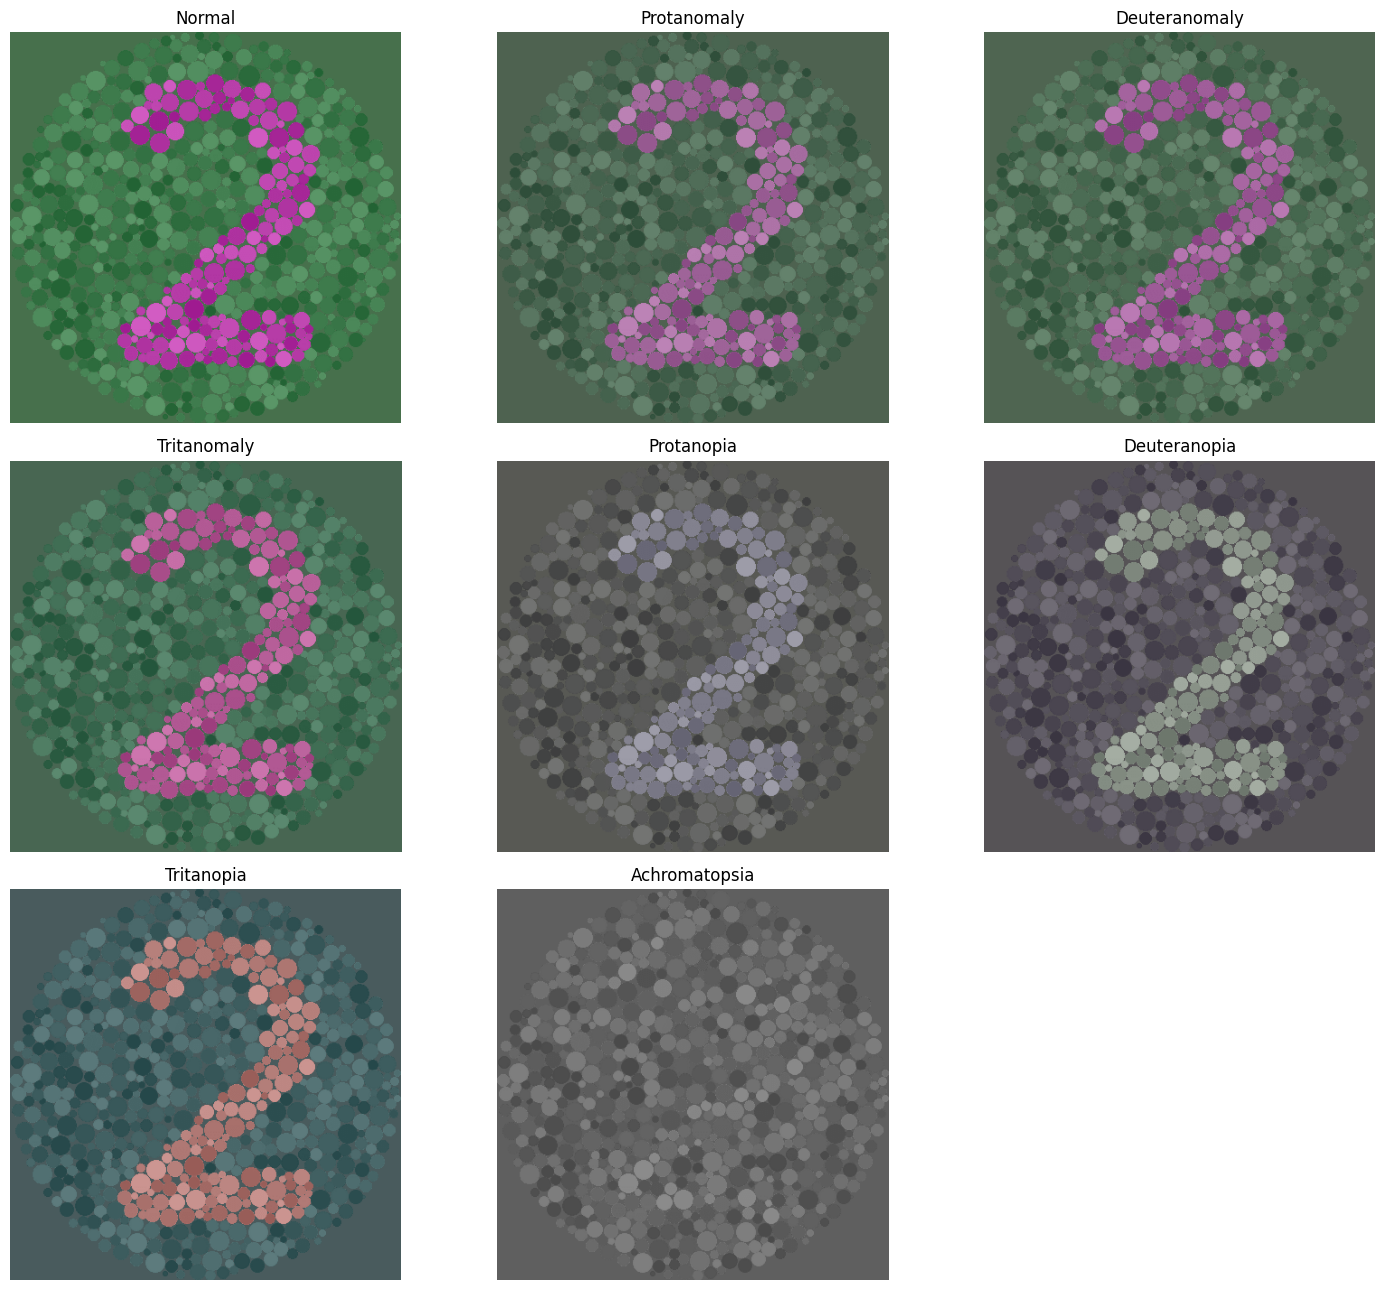

In [26]:
# Simulate different types of colorblindness
types = [
    "normal", "protanomaly", "deuteranomaly", "tritanomaly",
    "protanopia", "deuteranopia", "tritanopia", "achromatopsia"
]

# Create subplots to display all types
plt.figure(figsize=(15, 13))
for i, blindness_type in enumerate(types, 1):
    transformed_image = simulate_colorblindness(image, blindness_type)
    plt.subplot(3, 3, i)
    plt.imshow(transformed_image)
    plt.title(blindness_type.capitalize())
    plt.axis("off")

plt.tight_layout()
plt.show()

# Test Pola

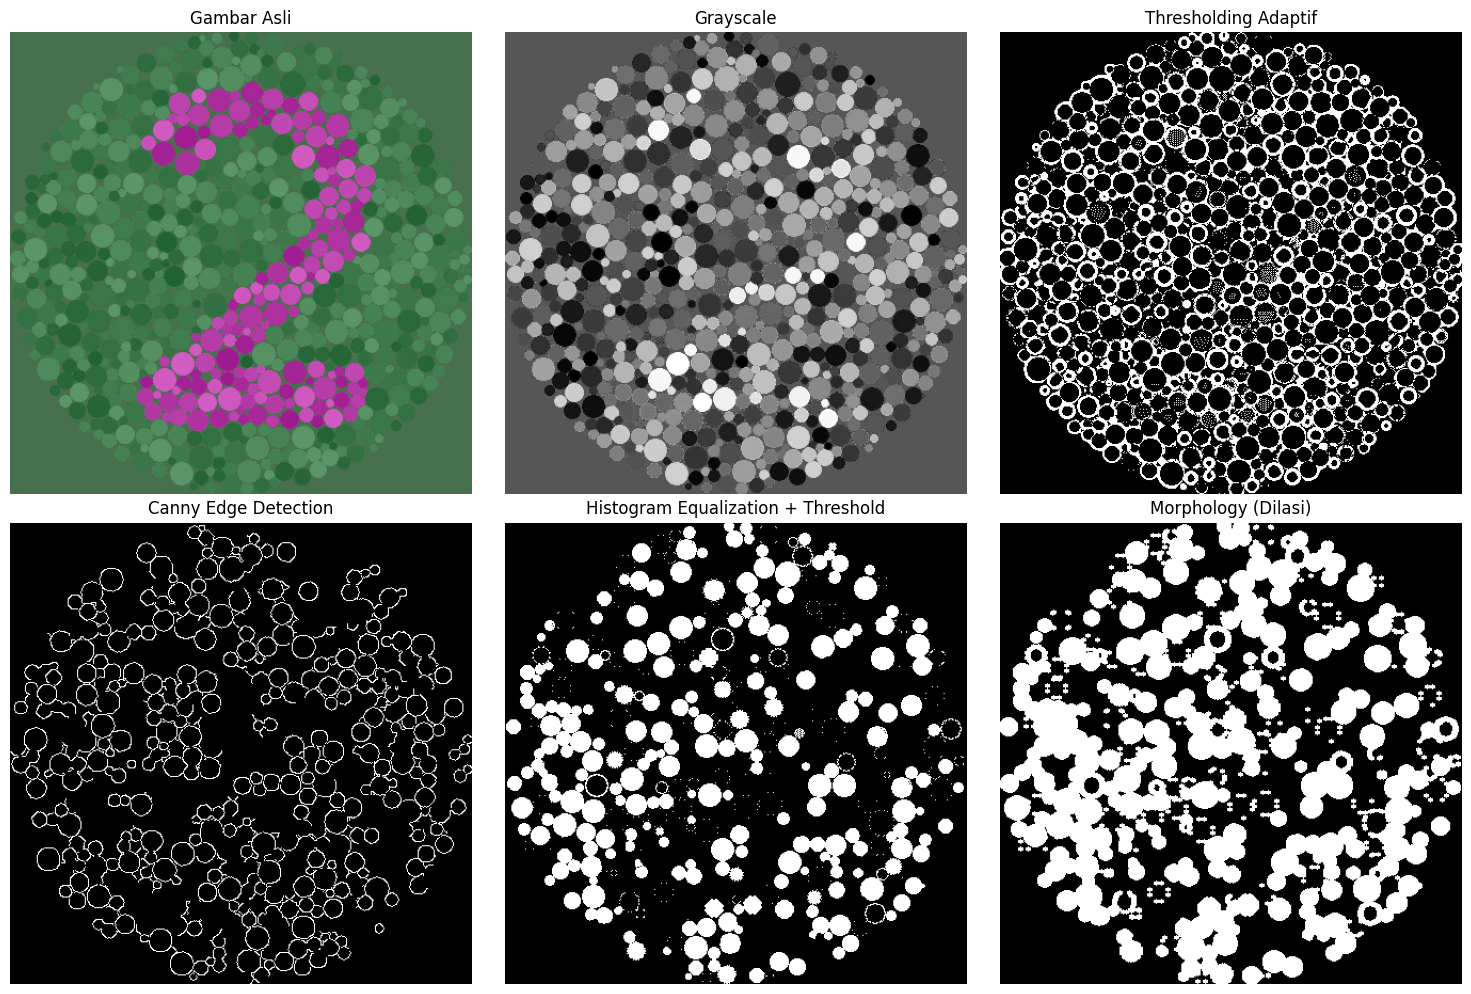

In [27]:
# Load gambar
image_path = "2-dark.png"
image_pola = cv2.imread(image_path)

# Konversi ke grayscale
gray = cv2.cvtColor(image_pola, cv2.COLOR_BGR2GRAY)

# Teknik 1: Thresholding adaptif
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Teknik 2: Canny Edge Detection
edges = cv2.Canny(gray, 50, 150)

# Teknik 3: Histogram Equalization
equalized = cv2.equalizeHist(gray)
_, thresh_equalized = cv2.threshold(equalized, 120, 255, cv2.THRESH_BINARY_INV)

# Teknik 4: Morfologi (dilasi setelah threshold)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
morph_dilate = cv2.dilate(thresh_equalized, kernel, iterations=1)

# Tampilkan hasil
plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image_pola, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis("off")

# Grayscale
plt.subplot(2, 3, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

# Thresholding Adaptif
plt.subplot(2, 3, 3)
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Thresholding Adaptif")
plt.axis("off")

# Canny Edge Detection
plt.subplot(2, 3, 4)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

# Equalized + Thresholding
plt.subplot(2, 3, 5)
plt.imshow(thresh_equalized, cmap="gray")
plt.title("Histogram Equalization + Threshold")
plt.axis("off")

# Morfologi (Dilasi)
plt.subplot(2, 3, 6)
plt.imshow(morph_dilate, cmap="gray")
plt.title("Morphology (Dilasi)")
plt.axis("off")

plt.tight_layout()
plt.show()

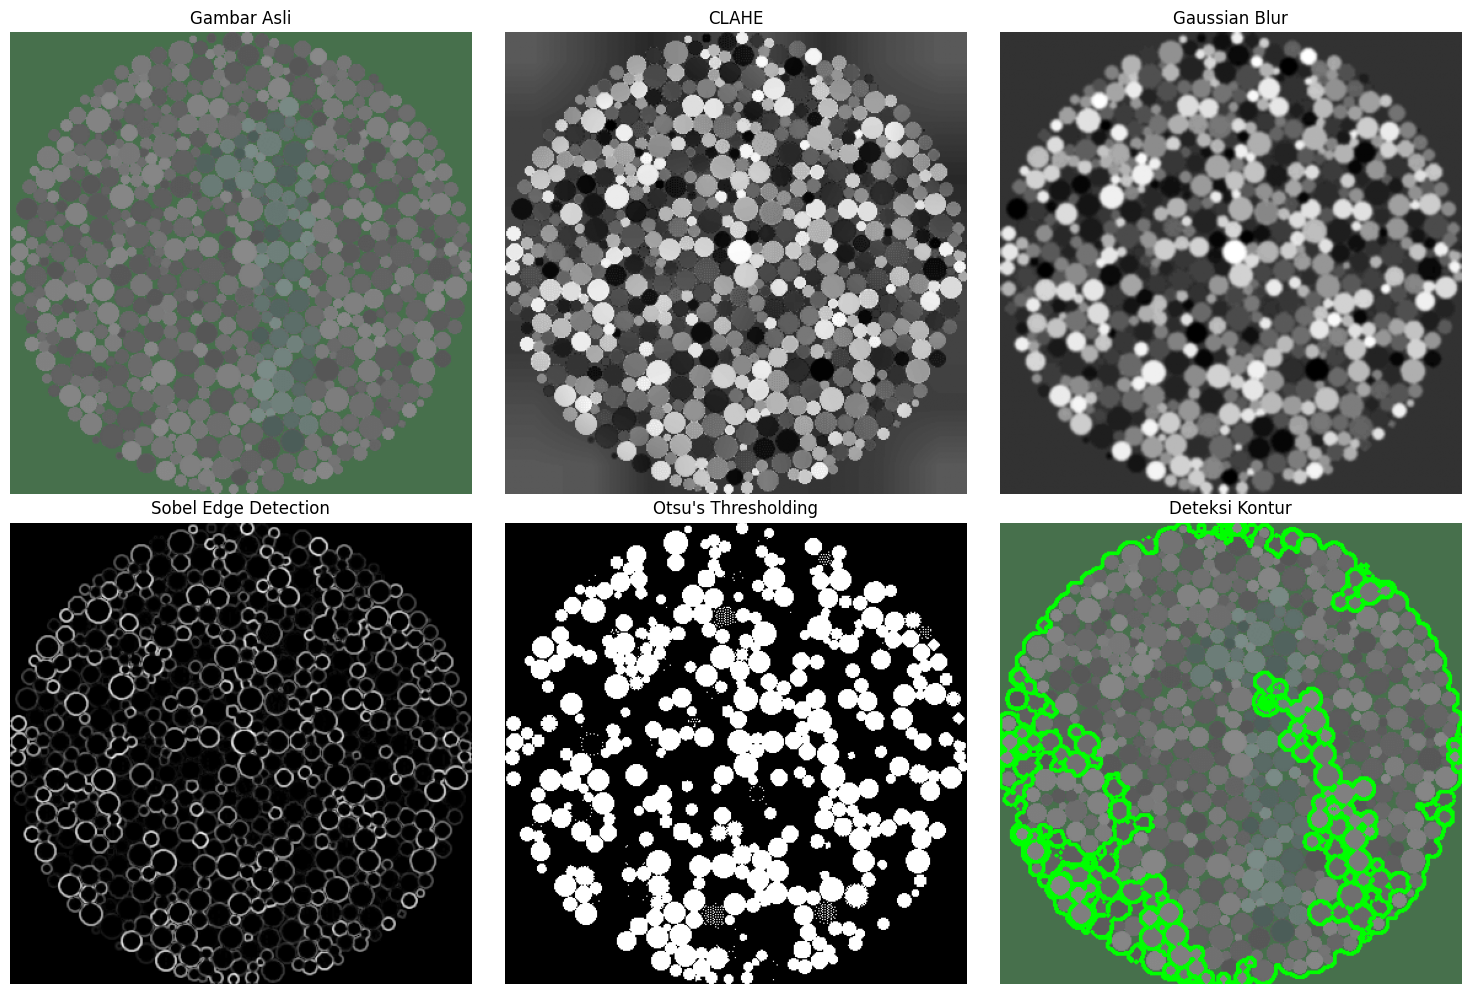

In [28]:
# Load gambar
image_path = "1-light.png"
image_pola = cv2.imread(image_path)

# Konversi ke grayscale
gray = cv2.cvtColor(image_pola, cv2.COLOR_BGR2GRAY)

# Teknik 1: CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

# Teknik 2: Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Teknik 3: Sobel Edge Detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Teknik 4: Otsu's Thresholding
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Teknik 5: Deteksi Kontur
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.drawContours(image_pola.copy(), contours, -1, (0, 255, 0), 2)

# Tampilkan hasil
plt.figure(figsize=(15, 10))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image_pola, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis("off")

# CLAHE
plt.subplot(2, 3, 2)
plt.imshow(clahe_img, cmap="gray")
plt.title("CLAHE")
plt.axis("off")

# Gaussian Blur
plt.subplot(2, 3, 3)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

# Sobel Edge Detection
plt.subplot(2, 3, 4)
plt.imshow(sobel_edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")

# Otsu's Thresholding
plt.subplot(2, 3, 5)
plt.imshow(otsu_thresh, cmap="gray")
plt.title("Otsu's Thresholding")
plt.axis("off")

# Deteksi Kontur
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Deteksi Kontur")
plt.axis("off")

plt.tight_layout()
plt.show()

## Mengonversi ke Ruang Warna yang Berbeda

**`cv2.cvtColor()`** Mengonversi gambar dari satu ruang warna ke ruang warna lainnya. Fungsi ini mengonversi gambar masukan dari satu ruang warna ke ruang warna lainnya. Dalam hal transformasi ke-dari ruang warna RGB, urutan saluran warna harus disebutkan secara eksplisit (RGB atau BGR). Perlu dicatat bahwa format warna default di OpenCV sering disebut RGB, tetapi sebenarnya itu adalah BGR (bytes dibalik). Jadi byte pertama dalam gambar warna standar (24-bit) adalah komponen Biru 8-bit, byte kedua adalah Hijau, dan byte ketiga adalah Merah. Byte keempat, kelima, dan keenam akan menjadi piksel kedua (Biru, kemudian Hijau, kemudian Merah), dan seterusnya.

### <font style="color:rgb(8,133,37)">Sintaks Fungsi </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Adalah gambar keluaran dengan ukuran dan kedalaman yang sama seperti `src`.

Fungsi ini memiliki **2 argumen yang diperlukan**:

1. `src` gambar masukan: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), atau floating-point presisi tunggal.

2. `code` kode konversi ruang warna (lihat ColorConversionCodes).

### <font style="color:rgb(8,133,37)">Dokumentasi OpenCV</font>

1. **`cv2.cvtColor`**: <a href="https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab" target="_blank">Link Dokumentasi</a>

2. **`ColorConversionCodes`**: <a href="https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0" target="_blank">Link Dokumentasi</a>

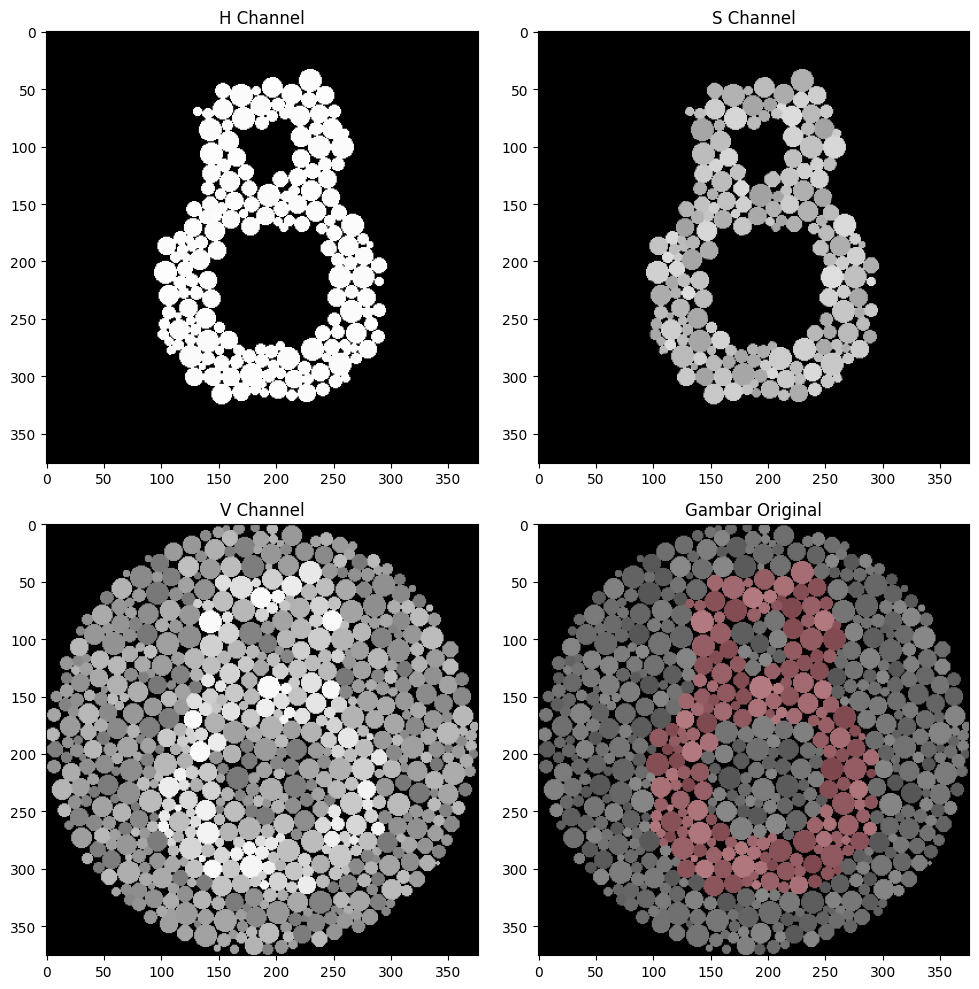

In [42]:
img_NZ_bgr = cv2.imread("8-light.png", cv2.IMREAD_COLOR)
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the H,S,V components
h,s,v = cv2.split(img_hsv)

plt.figure(figsize=[10,10])
plt.subplot(221); plt.imshow(h, cmap="gray"); plt.title("H Channel");
plt.subplot(222); plt.imshow(s, cmap="gray"); plt.title("S Channel");
plt.subplot(223); plt.imshow(v, cmap="gray"); plt.title("V Channel");
plt.subplot(224); plt.imshow(img_NZ_rgb); plt.title("Gambar Original");

plt.tight_layout()
plt.show()

Berdasarkan hasil yang Anda jelaskan, di mana saluran H (Hue) dan S (Saturation) memiliki pola yang lebih jelas, sementara saluran V (Value) dan gambar asli tidak begitu jelas, berikut adalah beberapa kemungkinan alasan dan penjelasan:

### 1. **H Channel (Hue) - Pola yang Jelas**
   - **Penjelasan**: Saluran H menunjukkan informasi tentang **warna** dalam gambar (misalnya merah, hijau, biru, dll.). Jika gambar yang Anda gunakan untuk tes buta warna mengandung warna-warna yang berbeda dengan kontras yang cukup, maka saluran H akan menunjukkan pola yang lebih jelas. Ini karena saluran H mewakili informasi warna yang lebih tajam, terutama jika ada variasi warna yang signifikan dalam gambar.
   - **Mengapa Pola Jelas**: Gambar test buta warna biasanya didesain untuk menampilkan perbedaan warna dengan jelas, yang membuat saluran H lebih terlihat.

### 2. **S Channel (Saturation) - Pola Cukup Jelas**
   - **Penjelasan**: Saluran S menunjukkan **kejenuhan warna** atau intensitas warna. Pada gambar dengan saturasi tinggi, warna akan terlihat lebih kuat, dan pada gambar dengan saturasi rendah, warna akan tampak lebih pudar atau abu-abu.
   - **Mengapa Pola Cukup Jelas**: Saturasi yang jelas membantu dalam memisahkan area dengan warna cerah atau jenuh, meskipun ada kemungkinan gambar Anda tidak memiliki saturasi yang sangat tinggi di semua bagian, sehingga saluran S kurang jelas dibandingkan saluran H.

### 3. **V Channel (Value) - Kurang Jelas**
   - **Penjelasan**: Saluran V menunjukkan **kecerahan atau intensitas** gambar. Ini mencerminkan seberapa terang atau gelap suatu piksel. Jika gambar memiliki pencahayaan yang kurang kontras atau sebagian besar bagian gambar memiliki kecerahan seragam, maka saluran V tidak akan menunjukkan pola yang jelas.
   - **Mengapa Kurang Jelas**: Gambar dengan pencahayaan yang datar atau tidak memiliki banyak kontras antara bagian gelap dan terang akan menyebabkan saluran V kurang efektif dalam menampilkan pola. Jika gambar tersebut lebih dominan pada warna netral atau memiliki area dengan tingkat kecerahan yang seragam, saluran V akan terlihat lebih kabur.

### 4. **Gambar Asli - Tidak Jelas**
   - **Penjelasan**: Gambar asli yang ditampilkan dalam format RGB mengandung campuran informasi dari saluran merah, hijau, dan biru. Jika gambar tersebut memiliki warna yang hampir seragam atau tidak ada kontras yang cukup, maka gambar asli akan terlihat kurang jelas.
   - **Mengapa Tidak Jelas**: Gambar asli yang digunakan untuk tes buta warna kemungkinan memiliki kontras yang rendah, warna yang pudar, atau desain yang tidak menonjolkan detail yang cukup sehingga sulit membedakan pola. Ini mungkin bertujuan untuk menantang penglihatan warna, tetapi juga membuat gambar tersebut kurang jelas.

### Saran untuk Meningkatkan Kejelasan:
1. **Menambah Kontras atau Pencahayaan**: Jika Anda ingin saluran V dan gambar asli lebih jelas, Anda bisa mencoba meningkatkan kontras atau kecerahan gambar menggunakan teknik seperti **histogram equalization** atau **CLAHE (Contrast Limited Adaptive Histogram Equalization)**.
   
   ```python
   # Meningkatkan kontras dengan CLAHE
   clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
   img_hsv[:, :, 2] = clahe.apply(img_hsv[:, :, 2])  # Meningkatkan kecerahan (V Channel)
   img_NZ_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
   ```

2. **Menggunakan Filter atau Peningkatan Kontras**:
   - Anda bisa menggunakan filter seperti **Gaussian Blur** pada saluran H, S, dan V untuk menonjolkan pola lebih baik.
   
   ```python
   h = cv2.GaussianBlur(h, (5, 5), 0)
   s = cv2.GaussianBlur(s, (5, 5), 0)
   v = cv2.GaussianBlur(v, (5, 5), 0)
   ```

3. **Pengolahan Gambar Asli**: Jika gambar asli tidak cukup jelas, Anda bisa mencoba teknik seperti **adaptive thresholding** atau **edge detection** untuk menonjolkan batas-batas gambar.

   ```python
   img_edge = cv2.Canny(cv2.cvtColor(img_NZ_rgb, cv2.COLOR_RGB2GRAY), 100, 200)
   plt.imshow(img_edge, cmap='gray')
   plt.title("Edge Detection")
   plt.show()
   ```

Dengan meningkatkan kontras atau menggunakan beberapa teknik pengolahan gambar tambahan, Anda mungkin bisa membuat saluran V dan gambar asli lebih jelas, dan membantu memperjelas pola dalam gambar tes buta warna.